In [1]:
include("../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using DifferentialEquations
using Plots
using .JuliaMBD
using .JuliaMBD.Diagram

In [6]:
## MSD

@model MSD begin
    @parameter begin
        M
        D
        k
        g = 9.8
    end
    @xmlmodel("MSD.drawio", "msd")
end

MSD (generic function with 1 method)

In [7]:
## test

@model Test begin
    @parameter begin
        M
        D
        k
        f
        p_cycle
        p_width
    end
    @xmlmodel("MSD.drawio", "testmodel")
    @scope begin
        msd.in => F
        msd.out => x
    end
end

Test (generic function with 1 method)

  4.913834 seconds (19.34 M allocations: 1.048 GiB, 3.57% gc time, 99.57% compilation time: 9% of which was recompilation)


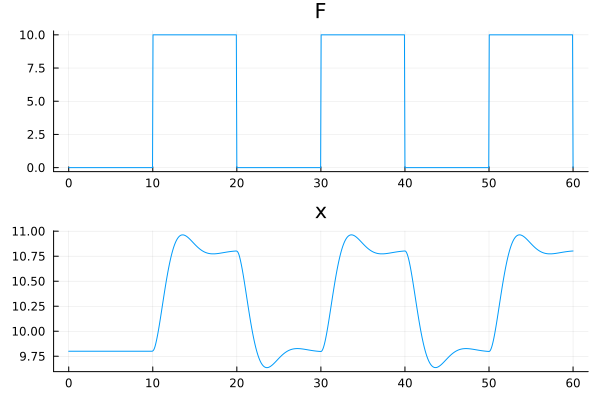

In [8]:
@time begin
    m = @compile Test(M=10, D=10, k=10, f=10, p_cycle=20, p_width=50)
    result = simulate(m, tspan=(0.0, 60.0))
    plot(result)
end